In [1]:
conda install TensorFlow

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Anu\anaconda3
Note: you may need to restart the kernel to use updated packages.


  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    absl-py-0.11.0             |     pyhd3eb1b0_1         103 KB
    astor-0.8.1                |           py37_0          47 KB
    gast-0.4.0                 |             py_0          15 KB
    grpcio-1.31.0              |   py37he7da953_0         1.5 MB
    keras-applications-1.0.8   |             py_1          29 KB
    keras-preprocessing-1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
bna = pd.read_csv('bank_note_data.csv')
bna.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [35]:
bna.isnull().value_counts()

Image.Var  Image.Skew  Image.Curt  Entropy  Class
False      False       False       False    False    1372
dtype: int64

In [36]:
bna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [37]:
bna.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [38]:
bna.corr()['Class']

Image.Var    -0.724843
Image.Skew   -0.444688
Image.Curt    0.155883
Entropy      -0.023424
Class         1.000000
Name: Class, dtype: float64

In [40]:
bna.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

<AxesSubplot:>

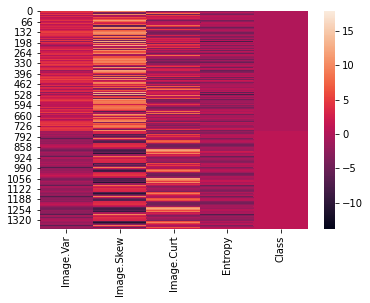

In [47]:
sns.heatmap(data=bna)

In [49]:
from sklearn.model_selection import train_test_split

In [100]:
X = bna.drop('Class',axis=1).values
y = bna['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
X_train.shape

(960, 4)

In [61]:
from tensorflow.keras.models import Sequential

C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [62]:
from tensorflow.keras.layers import Dense,Dropout

In [104]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [106]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/100
960/960 [==============================] - 1s 540us/sample - loss: 0.6829 - val_loss: 0.6512
Epoch 2/100
960/960 [==============================] - 0s 76us/sample - loss: 0.6379 - val_loss: 0.6099
Epoch 3/100
960/960 [==============================] - 0s 90us/sample - loss: 0.5997 - val_loss: 0.5653
Epoch 4/100
960/960 [==============================] - 0s 86us/sample - loss: 0.5593 - val_loss: 0.5234
Epoch 5/100
960/960 [==============================] - 0s 91us/sample - loss: 0.5187 - val_loss: 0.4789
Epoch 6/100
960/960 [==============================] - 0s 86us/sample - loss: 0.4750 - val_loss: 0.4344
Epoch 7/100
960/960 [==============================] - 0s 87us/sample - loss: 0.4319 - val_loss: 0.3927
Epoch 8/100
960/960 [==============================] - 0s 91us/sample - loss: 0.3914 - val_loss: 0.3536
Epoch 9/100
960/960 [==============================] - 0s 93us/sample - loss: 0.3507 - val_loss: 0.3248
Epoch 10/100
960/

960/960 [==============================] - 0s 91us/sample - loss: 0.0172 - val_loss: 0.0146
Epoch 79/100
960/960 [==============================] - 0s 87us/sample - loss: 0.0165 - val_loss: 0.0142
Epoch 80/100
960/960 [==============================] - 0s 83us/sample - loss: 0.0183 - val_loss: 0.0158
Epoch 81/100
960/960 [==============================] - 0s 86us/sample - loss: 0.0191 - val_loss: 0.0192
Epoch 82/100
960/960 [==============================] - 0s 85us/sample - loss: 0.0172 - val_loss: 0.0139
Epoch 83/100
960/960 [==============================] - 0s 85us/sample - loss: 0.0159 - val_loss: 0.0159
Epoch 84/100
960/960 [==============================] - 0s 87us/sample - loss: 0.0163 - val_loss: 0.0131
Epoch 85/100
960/960 [==============================] - 0s 84us/sample - loss: 0.0151 - val_loss: 0.0129
Epoch 86/100
960/960 [==============================] - 0s 86us/sample - loss: 0.0153 - val_loss: 0.0136
Epoch 87/100
960/960 [==============================] - 0s 87us/samp

<AxesSubplot:>

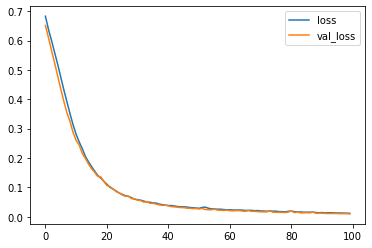

In [107]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [139]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [143]:
from tensorflow.keras.callbacks import EarlyStopping

In [150]:
ea = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [151]:
model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[ea])

Train on 960 samples, validate on 412 samples
Epoch 1/200
960/960 [==============================] - 0s 93us/sample - loss: 4.3269e-06 - val_loss: 2.8474e-05
Epoch 2/200
960/960 [==============================] - 0s 94us/sample - loss: 4.2815e-06 - val_loss: 2.7480e-05
Epoch 3/200
960/960 [==============================] - 0s 94us/sample - loss: 4.2307e-06 - val_loss: 2.7891e-05
Epoch 4/200
960/960 [==============================] - 0s 91us/sample - loss: 4.1306e-06 - val_loss: 2.6608e-05
Epoch 5/200
960/960 [==============================] - 0s 95us/sample - loss: 4.0791e-06 - val_loss: 2.5812e-05
Epoch 6/200
960/960 [==============================] - 0s 92us/sample - loss: 4.0510e-06 - val_loss: 2.5719e-05
Epoch 7/200
960/960 [==============================] - 0s 92us/sample - loss: 3.9801e-06 - val_loss: 2.4592e-05
Epoch 8/200
960/960 [==============================] - 0s 94us/sample - loss: 3.9160e-06 - val_loss: 2.3938e-05
Epoch 9/200
960/960 [==============================] - 0s 

Epoch 73/200
960/960 [==============================] - 0s 94us/sample - loss: 2.3873e-06 - val_loss: 5.7974e-06
Epoch 74/200
960/960 [==============================] - 0s 88us/sample - loss: 2.3930e-06 - val_loss: 5.7457e-06
Epoch 75/200
960/960 [==============================] - 0s 90us/sample - loss: 2.3799e-06 - val_loss: 5.6907e-06
Epoch 76/200
960/960 [==============================] - 0s 93us/sample - loss: 2.3792e-06 - val_loss: 5.4483e-06
Epoch 77/200
960/960 [==============================] - 0s 97us/sample - loss: 2.3778e-06 - val_loss: 5.3601e-06
Epoch 78/200
960/960 [==============================] - 0s 97us/sample - loss: 2.3584e-06 - val_loss: 5.3845e-06
Epoch 79/200
960/960 [==============================] - 0s 91us/sample - loss: 2.3355e-06 - val_loss: 5.2446e-06
Epoch 80/200
960/960 [==============================] - 0s 98us/sample - loss: 2.3459e-06 - val_loss: 5.1294e-06
Epoch 81/200
960/960 [==============================] - 0s 96us/sample - loss: 2.3431e-06 - val_

960/960 [==============================] - 0s 89us/sample - loss: 1.9628e-06 - val_loss: 1.9767e-06
Epoch 146/200
960/960 [==============================] - 0s 91us/sample - loss: 2.0227e-06 - val_loss: 2.0266e-06
Epoch 147/200
960/960 [==============================] - 0s 90us/sample - loss: 1.8765e-06 - val_loss: 1.9383e-06
Epoch 148/200
960/960 [==============================] - 0s 90us/sample - loss: 1.9165e-06 - val_loss: 1.9329e-06
Epoch 149/200
960/960 [==============================] - 0s 97us/sample - loss: 1.9266e-06 - val_loss: 1.9254e-06
Epoch 150/200
960/960 [==============================] - 0s 94us/sample - loss: 1.9360e-06 - val_loss: 1.9198e-06
Epoch 151/200
960/960 [==============================] - 0s 93us/sample - loss: 1.9783e-06 - val_loss: 1.8799e-06
Epoch 152/200
960/960 [==============================] - 0s 97us/sample - loss: 1.9384e-06 - val_loss: 1.8491e-06
Epoch 153/200
960/960 [==============================] - 0s 97us/sample - loss: 1.8592e-06 - val_loss:

<AxesSubplot:>

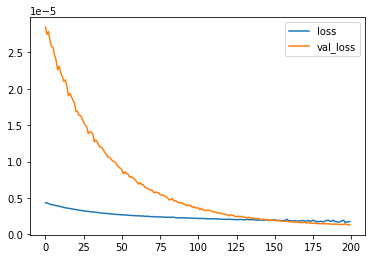

In [152]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [156]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [157]:
ea = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [158]:
model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),callbacks=[ea])

Train on 960 samples, validate on 412 samples
Epoch 1/300
960/960 [==============================] - 0s 494us/sample - loss: 0.6844 - val_loss: 0.6683
Epoch 2/300
960/960 [==============================] - 0s 111us/sample - loss: 0.6619 - val_loss: 0.6414
Epoch 3/300
960/960 [==============================] - 0s 38us/sample - loss: 0.6365 - val_loss: 0.6109
Epoch 4/300
960/960 [==============================] - 0s 115us/sample - loss: 0.6072 - val_loss: 0.5772
Epoch 5/300
960/960 [==============================] - 0s 125us/sample - loss: 0.5721 - val_loss: 0.5368
Epoch 6/300
960/960 [==============================] - 0s 46us/sample - loss: 0.5323 - val_loss: 0.4950
Epoch 7/300
960/960 [==============================] - 0s 103us/sample - loss: 0.4902 - val_loss: 0.4555
Epoch 8/300
960/960 [==============================] - 0s 101us/sample - loss: 0.4525 - val_loss: 0.4213
Epoch 9/300
960/960 [==============================] - 0s 116us/sample - loss: 0.4146 - val_loss: 0.3857
Epoch 10/30

960/960 [==============================] - 0s 56us/sample - loss: 0.0175 - val_loss: 0.0156
Epoch 79/300
960/960 [==============================] - 0s 71us/sample - loss: 0.0171 - val_loss: 0.0150
Epoch 80/300
960/960 [==============================] - 0s 82us/sample - loss: 0.0169 - val_loss: 0.0158
Epoch 81/300
960/960 [==============================] - 0s 85us/sample - loss: 0.0167 - val_loss: 0.0146
Epoch 82/300
960/960 [==============================] - 0s 93us/sample - loss: 0.0163 - val_loss: 0.0142
Epoch 83/300
960/960 [==============================] - 0s 100us/sample - loss: 0.0164 - val_loss: 0.0151
Epoch 84/300
960/960 [==============================] - 0s 93us/sample - loss: 0.0161 - val_loss: 0.0142
Epoch 85/300
960/960 [==============================] - 0s 102us/sample - loss: 0.0159 - val_loss: 0.0141
Epoch 86/300
960/960 [==============================] - 0s 97us/sample - loss: 0.0153 - val_loss: 0.0144
Epoch 87/300
960/960 [==============================] - 0s 103us/s

960/960 [==============================] - 0s 50us/sample - loss: 0.0045 - val_loss: 0.0049
Epoch 156/300
960/960 [==============================] - 0s 46us/sample - loss: 0.0051 - val_loss: 0.0047
Epoch 157/300
960/960 [==============================] - 0s 64us/sample - loss: 0.0041 - val_loss: 0.0036
Epoch 158/300
960/960 [==============================] - 0s 68us/sample - loss: 0.0043 - val_loss: 0.0036
Epoch 159/300
960/960 [==============================] - 0s 57us/sample - loss: 0.0042 - val_loss: 0.0038
Epoch 160/300
960/960 [==============================] - 0s 39us/sample - loss: 0.0044 - val_loss: 0.0034
Epoch 161/300
960/960 [==============================] - 0s 68us/sample - loss: 0.0039 - val_loss: 0.0036
Epoch 162/300
960/960 [==============================] - 0s 63us/sample - loss: 0.0039 - val_loss: 0.0037
Epoch 163/300
960/960 [==============================] - 0s 141us/sample - loss: 0.0039 - val_loss: 0.0037
Epoch 164/300
960/960 [==============================] - 0s

960/960 [==============================] - 0s 46us/sample - loss: 0.0012 - val_loss: 0.0011
Epoch 233/300
960/960 [==============================] - 0s 45us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 234/300
960/960 [==============================] - 0s 46us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 235/300
960/960 [==============================] - 0s 100us/sample - loss: 0.0012 - val_loss: 0.0011
Epoch 236/300
960/960 [==============================] - 0s 72us/sample - loss: 0.0012 - val_loss: 0.0010
Epoch 237/300
960/960 [==============================] - 0s 42us/sample - loss: 0.0011 - val_loss: 9.7955e-04
Epoch 238/300
960/960 [==============================] - 0s 42us/sample - loss: 0.0012 - val_loss: 9.9083e-04
Epoch 239/300
960/960 [==============================] - 0s 43us/sample - loss: 0.0014 - val_loss: 0.0010
Epoch 240/300
960/960 [==============================] - 0s 119us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 241/300
960/960 [===========================

<AxesSubplot:>

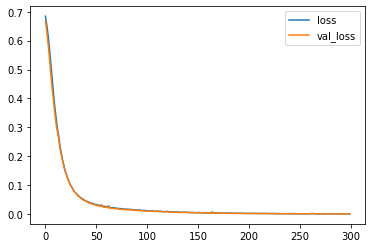

In [159]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [168]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [169]:
ea = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [170]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[ea])

Train on 960 samples, validate on 412 samples
Epoch 1/250
960/960 [==============================] - 0s 492us/sample - loss: 0.7517 - val_loss: 0.7140
Epoch 2/250
960/960 [==============================] - 0s 43us/sample - loss: 0.6970 - val_loss: 0.6890
Epoch 3/250
960/960 [==============================] - 0s 69us/sample - loss: 0.6810 - val_loss: 0.6738
Epoch 4/250
960/960 [==============================] - 0s 44us/sample - loss: 0.6682 - val_loss: 0.6622
Epoch 5/250
960/960 [==============================] - 0s 43us/sample - loss: 0.6561 - val_loss: 0.6489
Epoch 6/250
960/960 [==============================] - 0s 39us/sample - loss: 0.6422 - val_loss: 0.6324
Epoch 7/250
960/960 [==============================] - 0s 43us/sample - loss: 0.6219 - val_loss: 0.6078
Epoch 8/250
960/960 [==============================] - 0s 42us/sample - loss: 0.5937 - val_loss: 0.5745
Epoch 9/250
960/960 [==============================] - 0s 62us/sample - loss: 0.5573 - val_loss: 0.5321
Epoch 10/250
960/

960/960 [==============================] - 0s 44us/sample - loss: 0.0219 - val_loss: 0.0199
Epoch 79/250
960/960 [==============================] - 0s 43us/sample - loss: 0.0227 - val_loss: 0.0185
Epoch 80/250
960/960 [==============================] - 0s 39us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 81/250
960/960 [==============================] - 0s 41us/sample - loss: 0.0214 - val_loss: 0.0226
Epoch 82/250
960/960 [==============================] - 0s 42us/sample - loss: 0.0204 - val_loss: 0.0181
Epoch 83/250
960/960 [==============================] - 0s 41us/sample - loss: 0.0212 - val_loss: 0.0190
Epoch 84/250
960/960 [==============================] - 0s 41us/sample - loss: 0.0195 - val_loss: 0.0171
Epoch 85/250
960/960 [==============================] - 0s 39us/sample - loss: 0.0199 - val_loss: 0.0168
Epoch 86/250
960/960 [==============================] - 0s 42us/sample - loss: 0.0205 - val_loss: 0.0169
Epoch 87/250
960/960 [==============================] - 0s 42us/samp

<AxesSubplot:>

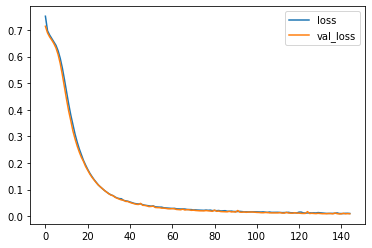

In [171]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [172]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [173]:
ea = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [174]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[ea])

Train on 960 samples, validate on 412 samples
Epoch 1/250
960/960 [==============================] - 1s 688us/sample - loss: 0.7050 - val_loss: 0.6821
Epoch 2/250
960/960 [==============================] - 0s 76us/sample - loss: 0.6755 - val_loss: 0.6568
Epoch 3/250
960/960 [==============================] - 0s 99us/sample - loss: 0.6626 - val_loss: 0.6408
Epoch 4/250
960/960 [==============================] - 0s 78us/sample - loss: 0.6418 - val_loss: 0.6230
Epoch 5/250
960/960 [==============================] - 0s 70us/sample - loss: 0.6334 - val_loss: 0.6033
Epoch 6/250
960/960 [==============================] - 0s 48us/sample - loss: 0.6190 - val_loss: 0.5808
Epoch 7/250
960/960 [==============================] - 0s 75us/sample - loss: 0.6027 - val_loss: 0.5524
Epoch 8/250
960/960 [==============================] - 0s 72us/sample - loss: 0.5616 - val_loss: 0.5149
Epoch 9/250
960/960 [==============================] - 0s 50us/sample - loss: 0.5455 - val_loss: 0.4812
Epoch 10/250
960/

960/960 [==============================] - 0s 73us/sample - loss: 0.0351 - val_loss: 0.0154
Epoch 79/250
960/960 [==============================] - 0s 69us/sample - loss: 0.0427 - val_loss: 0.0148
Epoch 80/250
960/960 [==============================] - 0s 75us/sample - loss: 0.0376 - val_loss: 0.0150
Epoch 81/250
960/960 [==============================] - 0s 60us/sample - loss: 0.0278 - val_loss: 0.0143
Epoch 82/250
960/960 [==============================] - 0s 82us/sample - loss: 0.0313 - val_loss: 0.0144
Epoch 83/250
960/960 [==============================] - 0s 60us/sample - loss: 0.0439 - val_loss: 0.0138
Epoch 84/250
960/960 [==============================] - 0s 82us/sample - loss: 0.0298 - val_loss: 0.0130
Epoch 85/250
960/960 [==============================] - 0s 74us/sample - loss: 0.0287 - val_loss: 0.0126
Epoch 86/250
960/960 [==============================] - 0s 75us/sample - loss: 0.0266 - val_loss: 0.0122
Epoch 87/250
960/960 [==============================] - 0s 78us/samp

<AxesSubplot:>

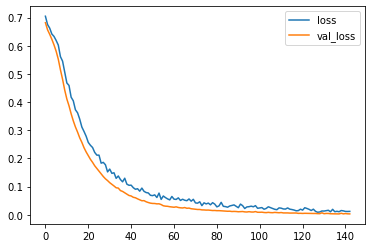

In [175]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [176]:
predictions = model.predict_classes(X_test)

In [177]:
from sklearn.metrics import classification_report,confusion_matrix

In [178]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       176

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [179]:
print(confusion_matrix(y_test,predictions))

[[236   0]
 [  0 176]]
